TO DO
***

**TO DO:**

Include an introduction to your notebook, setting the context and
describing what the reader can expect as they read down through
the notebook.


**

google pep 8 style code for python

**

**CLEAN UP**

`It tries to learn a smaller representation of its input (encoder) and then reconstruct its input from that smaller representation (decoder). An anomaly score is designed to correspond to the reconstruction error.`

Nice article here: https://thingsolver.com/time-series-anomaly-detection-using-a-variational-autoencoder-vae/#:~:text=It%20tries%20to%20learn%20a,)%2C%20a%20Bayesian%20neural%20network.

**Project Task:**

- On the keras5 website, there is an example of time-series anomaly detection  


- Re-create this example in a notebook of your own, explaining the concepts


- clearly explain each keras function used, referring to the documentation.


***
DELETE TO DO AFTERWARDS. JUST SOME GUIDENCE NOW. 
***



<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTy_W0CYhBKCrSlAkabQWffjRke71B63ixOUA&usqp=CAU" alt="anomaly" style="width: 380px;" align=right/>


<h1 style="color: #001a79;">Anomaly Detection using Keras</h1>

<hr style="border-top: 1px solid #001a79;" />

Offical documentation: https://keras.io/examples/timeseries/timeseries_anomaly_detection/

<br>

<h2 style="color: #001a79;">Introduction</h2>

<hr style="border-top: 1px solid #001a79;" />


This notebook is a re-creation of the timeseries anomaly detection using an Autoencoder.


The goal of this notebook is to display how we can reconstruct convilutional autoencoder model to detect anomalies using a timeseries. In other words, I will use keras on top of tensorflow to build and train a model which will hopefully detect anomolies.


The following code was adapted from the official documentation cited above and also from my lectures notebook which can be found here: https://github.com/ianmcloughlin/2223-S1-machine-learn-stats/blob/main/notebooks/05-evaluation.ipynb



<br>

<h2 style="color: #001a79;">Importing Modules</h2>

<hr style="border-top: 1px solid #001a79;" />

In [1]:
# For numerical arrrays.
import numpy as np

# Dealing with dataframes. 
import pandas as pd

# For neural networks.
import tensorflow.keras as keras

# For data visualisation. 
from matplotlib import pyplot as plt

<h3 style="color: #001a79;">TensorFlow</h3>


Tensorflow is a platform widely using in machine learning and statistics. It purpose is to aid with data automation, model tracking, performance monitoring and model retraining. 

Offical documentation can be found here: https://www.tensorflow.org/learn

<h3 style="color: #001a79;">Keras</h3>


Keras is a deep learning API which runs on top of TensorFlow. It's purpose is to provide a simple and flexible way of experimenting with ideas and producing fast results. It is an important library for completeing research. 


Offical documentation can be accessed here: https://keras.io/

<br>

<h2 style="color: #001a79;">Loading the data</h2>

<hr style="border-top: 1px solid #001a79;" />

https://www.kaggle.com/datasets/boltzmannbrain/nab

https://github.com/numenta/NAB

For this experiment the Numenta Anomaly Benchmark(NAB) dataset is used which can be found [here](https://www.kaggle.com/datasets/boltzmannbrain/nab). This an open source dataset is an artifical timeseries where the data is ordered, timestamped and has single-valued metrics. It is open source and contains labelled real-world time-series data which is what makes it so simple and effective to use. 

There are two csv files associated with this dataset which we will use for training and testing of data. The next code cell sets these up with their variable names. 

`artificialNoAnomaly/art_daily_small_noise.csv` contains a timestamp and some values. This csv contains articival data which doesn't contain any anomalies. This dataset will be used for training the model. 

`artificialWithAnomaly/art_daily_jumpsup.csv`also contains timestamps and values. The difference is that this file contains anomalies. This will be used for testing the model. 


In [2]:
# Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly for training.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly for testing
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

You can have a look at the urls in our web-browser. Follow the http links provided fromthe following two cells. Here you will see the raw data for these CSVs.

In [3]:
# http for data file without anomaly for training.
no_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv'

In [4]:
# http for data file with anomaly for testing. 
with_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/art_daily_jumpsup.csv'

<h3 style="color: #001a79;">Timeseries data without anomalies</h3>


Let's take a look at the data without anomalies using pandas to read in the csv file. 

In [5]:
# Small noise dataframe (no anomaly) for training.
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

Pandas has a lot of functionality when dealing with dataframes. I will use some of these functions to have a look at the data and ensure everything is in order. 

Offical documentation can be found here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [6]:
# describe returns descriptive analysis of df. 
df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


In [7]:
# head returns the first 5 rows of a df. 
df_small_noise.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


In [8]:
# iloc returns data at idex specified. 
df_small_noise.iloc[0]

value    18.324919
Name: 2014-04-01 00:00:00, dtype: float64

This is interesting development. Here, iloc has shown us the first row of data. What's curious is that the value appears to have been rounded. If you took a look at the raw data in the http earlier you would have seen the first value is differs from the value produced in the previous cell. 

Have a look at a screen-snip of it

![smallnoise](images/small_noise.jpg)

<br>

The first value is 18.324918539200002 whereas my dataframe has it as 18.324919

Let's look at row one using different methods:

In [9]:
# Let's look at row 1 value.
df_small_noise.iloc[0]['value']

18.3249185392

In [10]:
# Let's look at row 1 value 1.
df_small_noise.iloc[0].values[0]

18.3249185392

In [11]:
# Gives the closest value but still rounded
df_small_noise.iloc[0].values[0] * 10e12

183249185392000.0

After a bit of digging I foung a blogpost on stackoverflow which can be found here: https://stackoverflow.com/questions/43227058/why-is-python-pandas-dataframe-rounding-my-values


Someone else ran into similar issues and one response suggested it is the percision setting of pandas. When I researched the pandas documentation I found my answer here: https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html#frequently-used-options


It suggests that pandas is not changing the actual value but the way in which the value is displayed to us. Therefore, I have conclused that this is just a simple display issue which will not affect results when processing the data. 

<h3 style="color: #001a79;">Plotting timeseries data without anomalies</h3>

Let's take a look at our dataframe without anomalies from the small noise csv. 

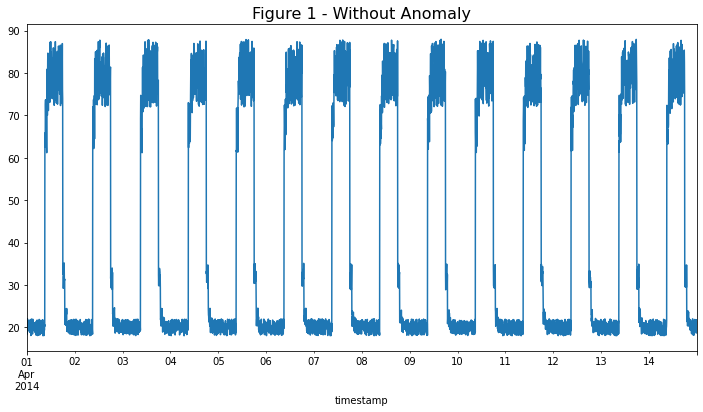

In [12]:
# Plot without anomalies. 
fig, ax = plt.subplots(figsize=(12,6))
plt.title("Figure 1 - Without Anomaly", size=16)

# ax=ax means it will create its own seet of axes . 
df_small_noise.plot(legend=False, ax=ax);

The data in Figure 1 will be used for training the model. 

<h3 style="color: #001a79;">Timeseries data with anomalies</h3>


Let's take a look at the data with anomalies using pandas to read in the csv file. 

In [13]:
# jumpsup dataframe (eith anomaly) for testing.
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

In [14]:
# describe returns descriptive analysis.
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


In [15]:
# Returns first 5 rows. 
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [16]:
# iloc returns specific row
df_daily_jumpsup.iloc[0]['value']

19.761251903

We can see the same thing has happened with the displaying of data. The value of the first row is different to the raw value. However, it is only afftected when displaying data using pandas. 


![jumpsup](images/jumpsup.jpg)

In [17]:
# shape returns the dimensionality of df. 
df_daily_jumpsup.shape

(4032, 1)

<h3 style="color: #001a79;">Plotting timeseries data with anomalies</h3>

Let's plot the dataframe with anomaly data from the jumpsup csv. 

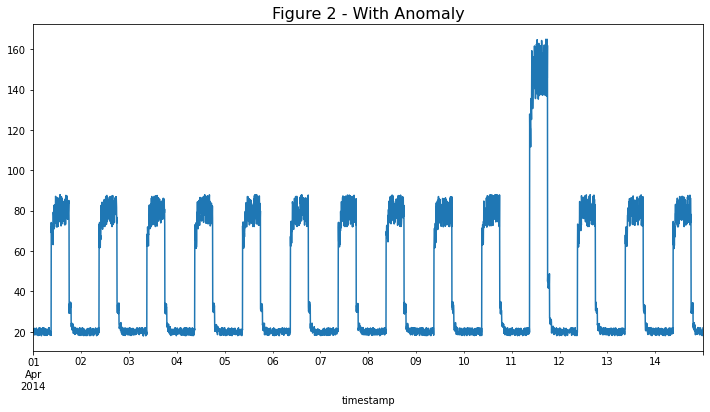

In [18]:
# Plot with anomalies. 
fig, ax = plt.subplots(figsize=(12,6))
plt.title("Figure 2 - With Anomaly", size=16)

# Use pandas to plot data frame.
df_daily_jumpsup.plot(legend=False, ax=ax);

We can see here in Figure }two that there is a jump in the data and the range of the y-axis differes from Figure 1 suggesting an anomaly is present. This data will be used for testing the model. 

<br>

<h2 style="color: #001a79;">Preprocessing</h2>

<hr style="border-top: 1px solid #001a79;" />

The idea around preprocessing is to prepare data before it goes into the neural network. This is done by creating a datafrane with trained data. And then by creating a window sequence for that trained data. 

<h3 style="color: #001a79;">Training the model</h3>

This is done using the data from the small noise dataframe which we saw back in Figure 1.

First we get the mean and standard deviation of the values. The we subtract the mean of the values from each of the values and divide by the standard deviation. 

This gives use our trained data. 

In [19]:
# Get mean of df without anomaly.
train_mean = df_small_noise.mean()

train_mean

value    42.438353
dtype: float64

In [20]:
# Get std of df without anomaly.
train_std = df_small_noise.std()

train_std

value    28.077122
dtype: float64

In [21]:
# Subtract mean and divide by std for training values. 
df_train_vals = (df_small_noise - train_mean) / train_std

In [22]:
# Have a look at training values.
df_train_vals.head()

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


We can create new columns for dataframes by simple assigning values to it. The next cell assigns values for mean and standard deviation which we can see in the dataframe below. 

In [23]:
# New column for mean. 
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()

# New column for std. 
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()

In [24]:
# See amended dataframe.
df_small_noise

,value,less_mean,div_std
timestamp,,,
2014-04-01 00:00:00,18.324919,-24.113435,-0.858829
2014-04-01 00:05:00,21.970327,-20.468026,-0.728993
2014-04-01 00:10:00,18.624806,-23.813547,-0.848148
2014-04-01 00:15:00,21.953684,-20.484669,-0.729586
2014-04-01 00:20:00,21.909120,-20.529234,-0.731173
...,...,...,...
2014-04-14 23:35:00,20.211195,-22.227159,-0.791647
2014-04-14 23:40:00,20.531041,-21.907313,-0.780255
2014-04-14 23:45:00,19.032127,-23.406226,-0.833640


In [25]:
# Have a look at means for columns.
df_small_noise['value'].mean(), df_small_noise['less_mean'].mean(), df_small_noise['div_std'].mean()

(42.438353335806646, -7.342627387941552e-14, -2.616541242931684e-15)

In [26]:
# Have a look at std of columns. std of value and less mean are the same. 
df_small_noise['value'].std(), df_small_noise['less_mean'].std(), df_small_noise['div_std'].std()

(28.077122281262515, 28.077122281262508, 1.0000000000000018)

<h3 style="color: #001a79;">Plotting the trained data</h3>

Let's have a look at the trained data. 

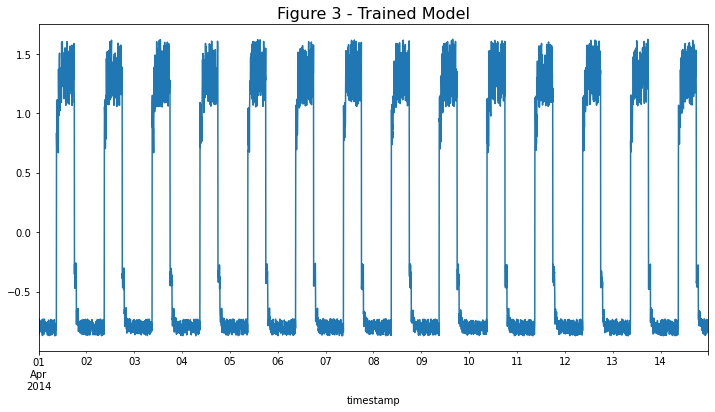

In [27]:
# Plotting the trained data
fig, ax = plt.subplots(figsize=(12,6))
plt.title("Figure 3 - Trained Model", size=16)

# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax);

Okay so we can see from Figure 3 that training the data has changed the results if you compare it to before it was trained in Figure 1. It's basically just scaled down the y-axis. 


The reason for this is that the standard deviation shoud always be around 1. Really this figure should be centered around zero with equal distance between the high and low values. We can see here that the high values are around 1.5 whereas the low ones are at about -0.8. This suggests there are more low values than high ones because the high ones are further away from zero. 


In any case, this shouldn't affect the trained model as it should still detect an anomaly. 

In [28]:
# Look at shape of the trained model. 
df_train_vals.shape

(4032, 1)

<h3 style="color: #001a79;">Creating a Window Sequence</h3>


What is the purpose of a window?

I found a good blog post which helps explain the meaning behind a sliding window in anomaly detection. It can be found here: https://medium.com/@krzysztofdrelczuk/time-series-anomaly-detection-with-python-example-a92ef262f09a


Basically, a sliding window is used across an array of values. Each window is the actual input the the neural network. And it will check the mean and standard deviation in each window. This is compared to the testing data. If they differ then there is an anomaly. 

<h4 style="color: #001a79;">Example of how a window works</h4>

In [29]:
# EXAMPLE OF HOW A WINDOW FUNCTION WILL WORK. 

# Dummy window list.
L = [1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]

# Example window size.
win_size = 3

# Length of L.
len(L)

12

In [30]:
#Subtract number of windows from length of L.
len(L) - (win_size - 1)

10

In [31]:
# Remove brackets and gives the same response.
len(L) - win_size + 1

10

In [32]:
# Print the windows from i up to i plus the window size. 
for i in range(len(L) - win_size + 1):
    print(L[i:i + win_size])

[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
[5, 6, 7]
[6, 7, 1]
[7, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]


In [33]:
# For accumulating the windows.
wins = []

# Generate the windows and add to list.
for i in range(len(L) - win_size + 1):
    wins.append(L[i:i + win_size])

wins

[[1, 1, 2],
 [1, 2, 4],
 [2, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 1],
 [7, 1, 2],
 [1, 2, 3],
 [2, 3, 4],
 [3, 4, 5]]

Numpy has a has quite a useful method called stack. Basically, it takes in a sequence for example a the wins list. And it returns these wins in a single numpy array. 

Offical documentation can be found here: https://numpy.org/doc/stable/reference/generated/numpy.stack.html

In [34]:
# Create a 2D numpy array from wins.
np.stack(wins)

array([[1, 1, 2],
       [1, 2, 4],
       [2, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 1],
       [7, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

<h3 style="color: #001a79;">Generating the window sequence</h3>

Now that we understand how create a sliding window and what it is used for we need to generate one for the training model. 

In [35]:
# Setting the window size for trained model. 
window_size = 288

In [36]:
# Function to create the window.
def windows(vals, N=window_size):
  # Start with an empty list.
  L = []
  # loop through all possible windows
  for i in range(len(vals) - N + 1):
    # Append window to list.
    L.append(vals[i:i+N])
  # Stack them in np array. 
  return np.stack(L)

This function takes the values and the window size. Loops through all the possible windows of those values, appends them to a list and converts that list into a numpy array. 

In [37]:
# Create the window sequence for training values. 
x_train = windows(df_train_vals)

Now that the window sequences have been created lets compare the first and last values of the windows to the first and last values of the training model. 

In [38]:
# Shows first and last values of the windows array.  
x_train[0][0], x_train[-1][-1]

(array([-0.85882857]), array([-0.8460886]))

In [39]:
# Shows frist and last values of the training values. 
df_train_vals.iloc[0], df_train_vals.iloc[-1]

(value   -0.858829
 Name: 2014-04-01 00:00:00, dtype: float64,
 value   -0.846089
 Name: 2014-04-14 23:55:00, dtype: float64)

Okay so we can see they're pretty much the same which is good. Pandas has rounded the values again but as already stated this won't affect my results. 

In [40]:
# Check the shape
x_train.shape

(3745, 288, 1)

In [41]:
# Pull out values of the training model. 
df_train_vals['value'].values

array([-0.85882857, -0.72899302, -0.84814772, ..., -0.83364049,
       -0.73510213, -0.8460886 ])

Numpy has another useful method flatten. This take a 2D arrray and flattens it into one dimension. The reason we are flattening this is so we can use it more efficently in the neural network. 

Offical documentation can be found here: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html

In [42]:
# FLATTEN GETS RID OF ALL INNER ARRAYS AND FLATTENS THEM OUT
x_train[0].flatten()

array([-0.85882857, -0.72899302, -0.84814772, -0.72958579, -0.731173  ,
       -0.75730984, -0.77645641, -0.7880838 , -0.747012  , -0.829166  ,
       -0.80377285, -0.7821597 , -0.81182078, -0.80949918, -0.82334701,
       -0.79001779, -0.74922405, -0.84169024, -0.73727717, -0.77223023,
       -0.75311352, -0.79116337, -0.75934728, -0.86809294, -0.75381057,
       -0.86468256, -0.74361965, -0.72908121, -0.82850668, -0.84043795,
       -0.76136364, -0.8343536 , -0.74708881, -0.85574949, -0.85245676,
       -0.73090636, -0.77440264, -0.74974936, -0.82419543, -0.77402585,
       -0.78574242, -0.7844733 , -0.77316412, -0.78843253, -0.80927467,
       -0.83109167, -0.76090519, -0.83816509, -0.77176485, -0.83715923,
       -0.78131343, -0.76396862, -0.83924191, -0.86186112, -0.85174179,
       -0.78406773, -0.74938477, -0.86399047, -0.76581026, -0.82177506,
       -0.80222751, -0.73807119, -0.82310669, -0.80410682, -0.86845167,
       -0.85877599, -0.83356075, -0.86643297, -0.78045221, -0.80

<h3 style="color: #001a79;">Plotting the Window Sequence</h3>

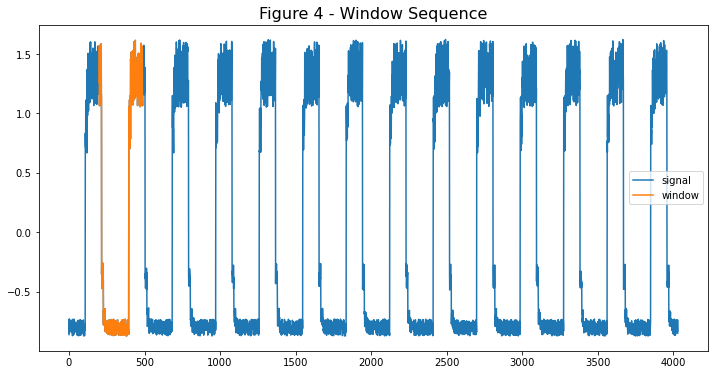

In [43]:
# Assign window number
window_no = 200

# Plotting the window
fig, ax = plt.subplots(figsize=(12, 6))
plt.title("Figure 4 - Window Sequence", size=16)

# Pull out training values for y
y = df_train_vals['value'].values

# Create an array
ax.plot(np.arange(y.shape[0]), y, label='signal')

# Assign the first window. 
w = x_train[window_no].flatten()

# PLot the first windw on top the the training values.
ax.plot(np.arange(w.shape[0]) + window_no, w, label='window')

ax.legend();

<br>

<h2 style="color: #001a79;">Neural Network</h2>

<hr style="border-top: 1px solid #001a79;" />

A neural network is like a basket of neurons. These neurons take in inputs and give outputs. The neurons in the network are all connected. An example of a neural network is Google's search algorithm. A search is input in and google returns an output of results based on that input. 

For more on neural networks check out this nice blog I found: https://www.ibm.com/cloud/learn/neural-networks

In [44]:
# Check out the shape of the window sequence
x_train.shape

(3745, 288, 1)

<h3 style="color: #001a79;">Layers</h3>

The keras documentation states that layers are like building blocks for neural networks. In other words, each layer contributes to the foundation of the neural network. 


Let's explore the layers used in the code cell below:


- `Input` - the input layer decides the shape of the network. In the cell below I have passed in the trained input shape and the trained output shape. It is possible to only select an inpupt shape, however, the idea of the training model is to train the input and output so that when an anomaly occures it can be detected. 



- `Conv1D` - the 1D convolution layer is important as it combines two signals to form a third one. In other words, the relationship between the input and output is expressed through this third signal. This is a good blogpost about the meaning behind convolution: https://www.tutorialspoint.com/what-is-convolution-in-signals-and-systems



- `Dropout` - the dropout layer is used to input units to 0 with the specified rate. The idea of this is to prevent overfitting. In other words, we don't have the results produced to return the exact same data. 



- `Conv1DTranspose` - the 1D convolution transpose layer does what the basic convolution layer does but with a modified input feature map. What this means is that the it is taking in the input signal, transforming it a bit and combining it with the output signal and give a thrid signal. 



Offical documentation can be found here: https://keras.io/api/layers/#:~:text=Layers%20are%20the%20basic%20building,variables%20(the%20layer%27s%20weights).

In [45]:
# Building block for neural network.
layers = [
  # Determine shape of neural network.
  keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
  # To combine 1D signals.
  keras.layers.Conv1D(filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  # To prevent overfitting.
  keras.layers.Dropout(rate=0.2),
  # To combine 1D signals again.
  keras.layers.Conv1D(filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  # To combine 1D signals while transforming input signal
  keras.layers.Conv1DTranspose(filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #To prevent overfitting again.
  keras.layers.Dropout(rate=0.2),
  # To combine 1D signals while transforming input signal again.
  keras.layers.Conv1DTranspose(filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  # To combine 1D signals while transforming input signal again.
  keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]

<h5>Sequential</h5>

In the code cell below the `Sequential` method is used. This stipulates that the way the layers are listed above is the exact order in which the blocks will be built. We can see that some layers are used multiple times. This is part of the design of the neural network and is intended to be layered in this order. 

In [46]:
# To build the network in the exact order of layers. 
model = keras.Sequential(layers)

<h5>Adam Optimization</h5>

Adam is a class of the optimizer method within Keras. It is considered to be one of the best optimizers. The official Keras documentation states:


> Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.


Basically, the stochastic gradient decent is an iterative method which maintains a single learning rate. This rate does not change for the duration of the test. The Adam is used here as it is known for achieving good, results fast. The idea behind an optimizer is to change some attributes of the model to to smooth out any bumps to reduce the losses so that we can help faster results.


There is a nice blog which introduces the idea of Adam optimization. It can be found here: https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

In [47]:
# Optimization for stochastic gradient descent.
optimizer = keras.optimizers.Adam(learning_rate=0.001)

<h5>Losses</h5>

I mentioned this idea of losses previously. The loss function is used as part of the optimization process. This is done because the error for the current state of the training model must be estimated on a continuous basis. To allow for this error we introduce a loss function. This produces an estimate so the state can be updated which will reduce the loss on the next window evaluation. 

We introduce our loss through the compile method. All this means is that we are compliling out model using the mse loss function. 

In [48]:
# complile it - LOADS OUT THERE ON LOSS MSE
model.compile(optimizer=optimizer, loss="mse")

<h5>Mean Squared Error (MSE)</h5>

MSE is one of the loss function classes available in Keras. The official documentation states that it calculates the mean of squares of errors between labels and predictions. 


We have established that we are using a loss function to reduce the loss for the next evaluation but why MSE? 


MSE is considered to be the simplest loss function available to us. There is a nice blog I found which explains it quite well. The MSE takes the difference between the model's predictions and the actual data and squares it. Next you get the average across the whole dataset. 

The blog can be found here: https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3

<h5>Summary</h5>

This is a useful method which returns a summary of each layer of the neural network including the layer type, shape and number of weight parameters in each layer. We can see the summary has produces data in the same order the layers were input. This is because we passed the layers into the sequential method. The main aspect to take from this table is that out of 9505 parameters all are trainable. 

In [49]:
# Summary of network
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

<h5>Model Fit</h5>

Now that the model has been configured and compliled we need to train it. This is done in the code cell below using the model fit method. 


When training the model we need to consider what we are looking for. There are a number of parameters which need to be passed in to train the model. 

Parameters:

- input data: we are passing in the trained data set for the input data. 


- target data: again we are using the same trained data as the target output. This is because we are trying to train the model on both the input and the output being the same. 


- epochs: this an arbitrary cutoff where the training will happen until the cutoff has been reached. 


- batch size: is used to determine how many windows are pushed in at one time. 


- valudation split: This is to hold back a certain amount for validation. 


- callbacks: to stop the training process if the monitored metrics has stopped improving. 

In [50]:
# Training the model. 
history = model.fit(
    x_train, 
    x_train,
    epochs=50,
    batch_size=128, 
    validation_split=0.1, 
    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")],
)

Epoch 1/50
27/27 [==============================] - 13s 344ms/step - loss: 0.5122 - val_loss: 0.0670
Epoch 2/50
27/27 [==============================] - 11s 401ms/step - loss: 0.0815 - val_loss: 0.0421
Epoch 3/50
27/27 [==============================] - 12s 442ms/step - loss: 0.0603 - val_loss: 0.0363
Epoch 4/50
27/27 [==============================] - 5s 193ms/step - loss: 0.0498 - val_loss: 0.0295
Epoch 5/50
27/27 [==============================] - 4s 160ms/step - loss: 0.0416 - val_loss: 0.0259
Epoch 6/50
27/27 [==============================] - 5s 197ms/step - loss: 0.0361 - val_loss: 0.0241
Epoch 7/50
27/27 [==============================] - 4s 158ms/step - loss: 0.0328 - val_loss: 0.0234
Epoch 8/50
27/27 [==============================] - 4s 163ms/step - loss: 0.0306 - val_loss: 0.0217
Epoch 9/50
27/27 [==============================] - 4s 148ms/step - loss: 0.0289 - val_loss: 0.0220
Epoch 10/50
27/27 [==============================] - 4s 147ms/step - loss: 0.0273 - val_loss: 0.0

We can see from the out of the cell. The the process cut off at 50 as was selected. We can also see the seconds it took to process, the step it took, the loss and the validation loss for each round of training. 


Now both our data and model have been trained. The next step is the evaluation process. 

<br>

<h2 style="color: #001a79;">Evaluation</h2>

<hr style="border-top: 1px solid #001a79;" />

IN THIS SECITON BLAH BLAH BLAH



<h3 style="color: #001a79;">History</h3>

Another parameter of the model fit method is a history dictionary. This means we can access the history of the fitted model. For example in the cells below, we can see the loss history and the value loss history. 

In [51]:
# Retrieve loss history of the trained model.
history.history["loss"]

[0.5122044086456299,
 0.08148341625928879,
 0.060313642024993896,
 0.04984293505549431,
 0.041597601026296616,
 0.036137618124485016,
 0.03284522891044617,
 0.030558781698346138,
 0.0288963932543993,
 0.027273789048194885,
 0.02598949708044529,
 0.024826277047395706,
 0.023763881996273994,
 0.022812942042946815,
 0.021938420832157135,
 0.02118627540767193,
 0.020427389070391655,
 0.019726473838090897,
 0.019060757011175156,
 0.01836923137307167,
 0.017802106216549873,
 0.01719696633517742,
 0.016652075573801994,
 0.01611524075269699,
 0.015556765720248222,
 0.01496160589158535,
 0.014420914463698864,
 0.013887383975088596,
 0.013331725262105465,
 0.01284704077988863,
 0.012373164296150208,
 0.011911974288523197,
 0.011517137289047241,
 0.011119499802589417,
 0.01079057902097702,
 0.010422063060104847,
 0.010107742622494698,
 0.009786553680896759,
 0.00950484350323677,
 0.009212151169776917,
 0.009017315693199635,
 0.008667913265526295,
 0.008441212587058544,
 0.008274344727396965,
 0.0

In [52]:
# Retrieve value oss history of the trained model.
history.history["val_loss"]

[0.06701964139938354,
 0.04206489399075508,
 0.036308396607637405,
 0.029467178508639336,
 0.02587117813527584,
 0.024148879572749138,
 0.023399418219923973,
 0.021733777597546577,
 0.02197044901549816,
 0.021592605859041214,
 0.021305201575160027,
 0.02120433747768402,
 0.020460082218050957,
 0.019993439316749573,
 0.019921356812119484,
 0.019925372675061226,
 0.020151430740952492,
 0.020315807312726974,
 0.019846729934215546,
 0.01986714079976082,
 0.0196546483784914,
 0.019011138007044792,
 0.019602641463279724,
 0.019062465056777,
 0.017839837819337845,
 0.01819637604057789,
 0.017566973343491554,
 0.01623099111020565,
 0.016301779076457024,
 0.01538353692740202,
 0.014057334512472153,
 0.013112322427332401,
 0.013393562287092209,
 0.012208253145217896,
 0.011706105433404446,
 0.01111334003508091,
 0.010790779255330563,
 0.009782355278730392,
 0.00939243659377098,
 0.009069814346730709,
 0.008601690642535686,
 0.00812579970806837,
 0.008022980764508247,
 0.0077232676558196545,
 0.0

<h3 style="color: #001a79;">Plotting the loss history</h3>

The idea behind accessing these history values is that now we visualise them through a plot. The question is, what are we trying to plot?


There is a nice article on learning curves which touches on loss and validation losss. It explains that the loss tells us how well our model is fitting the training data. Whereas the validation loss reflects how well the model fitting the testing data. 

Article can be found here: https://www.baeldung.com/cs/learning-curve-ml

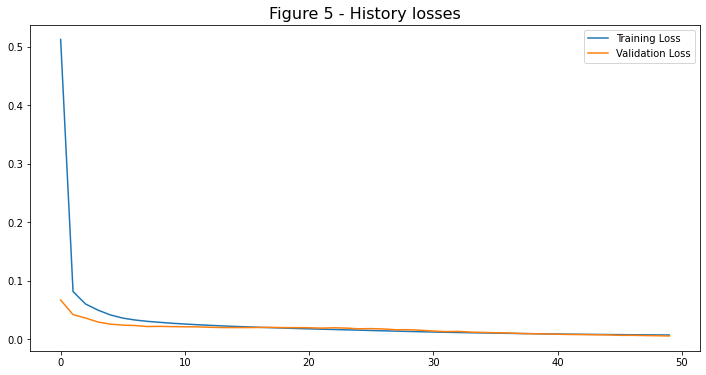

In [53]:
# Plot the loss history. 
fig, ax = plt.subplots(figsize=(12, 6))
plt.title("Figure 5 - History losses", size=16)
 
# Training loss history.
ax.plot(history.history["loss"], label="Training Loss")
# Validation loss history. 
ax.plot(history.history["val_loss"], label="Validation Loss")

ax.legend();

What we can see in Figure 5 is the loss on the y-axis and the attempts on the x-axis. This is suggesting that the valdation loss has a good training rate. And the training loss seems to be a bit higher but both losses appear to be working in a similar manner which is a plus. 

<h3 style="color: #001a79;">Predict the loss</h3>

Next step is to predict the training loss. This is done using the model predict method in keras. This helps fits into the model well and perdicts the outcome of the data. 

In [54]:
# Predict data outcome.
x_train_pred = model.predict(x_train)

118/118 [==============================] - 3s 20ms/step


Once the prediction has been made we now need to calculate the MSE loss. This is done by subtracting the window sequence from the trained prediction data and retrieving the mean. 

In [55]:
# Calculate the loss of predicted outcome. 
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

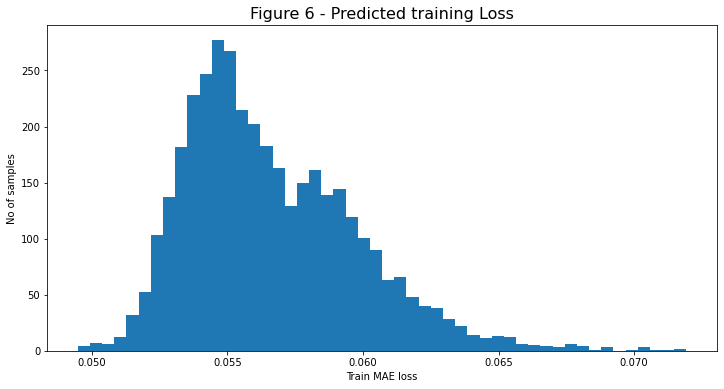

In [56]:
# Plot the predicted loss.  
fig, ax = plt.subplots(figsize=(12, 6))
plt.title("Figure 6 - Predicted training Loss", size=16)

# Histogram of predicted loss 
ax.hist(train_mae_loss, bins=50)
# Loss
ax.set_xlabel("Train MAE loss")
# Samples
ax.set_ylabel("No of samples");

In Figure 6 we can see the predicted training loss. This histogram is showing us that there model did pretty well. There are a lot of samples between 0.16 and 0.17. One could the losses for most samples is around 0.16. 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

finished here for the day

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [57]:
# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)

# 
threshold

0.0719363594428523

TRAIN GOES IN AS INPUT AND OUTPUT. SO IT'S TRAINIGN IT TO GIVE THE SAME OUTPUT AS INPUT. SO WHEN IT GET AN INPUT FOR AN ANOMATLY IT SHOULD DETECT A DIFFERENT OUTPUT. AAND OUTPUT SHOULD BE FAR ENOUGH AWAY THAT IT RAISES A FLAG. THEREFORE IT'S AN ANOMALY!

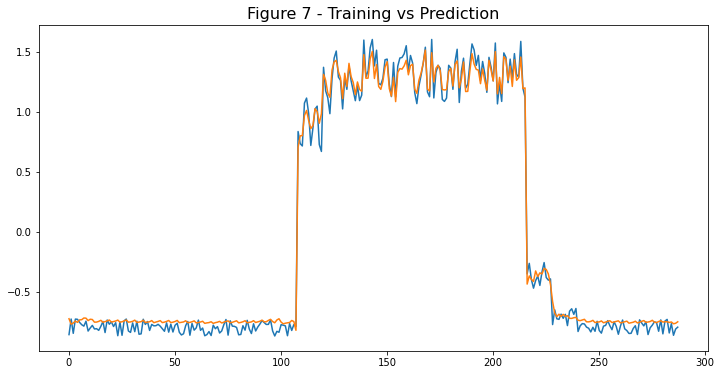

In [58]:
# PLOTTING TRAINING SET AGAINST WHAT THE NEURAL NETWROK IS
# PREDICTING THE OUTPUT SHOULD BE

# 
fig, ax = plt.subplots(figsize=(12, 6))
plt.title("Figure 7 - Training vs Prediction", size=16)

# 
ax.plot(x_train[0])

# 
ax.plot(x_train_pred[0]);

In [59]:
# apply same operation to all  


df_test_value = (df_daily_jumpsup - train_mean) / train_std

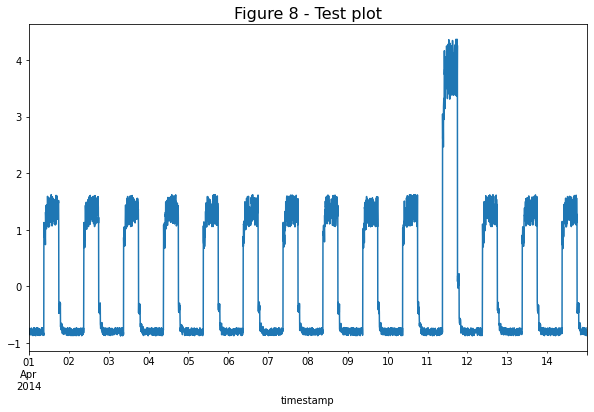

In [60]:
# now plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Figure 8 - Test plot", size=16)
# 
df_test_value.plot(legend=False, ax=ax);

In [61]:
# Create sequences from test values.
x_test = windows(df_test_value.values)

x_test.shape

(3745, 288, 1)

In [62]:
# 
x_test_pred = model.predict(x_test)

118/118 [==============================] - 3s 24ms/step


In [63]:
# 
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

test_mae_loss

array([[0.05312121],
       [0.05508271],
       [0.0533212 ],
       ...,
       [0.05763221],
       [0.05750708],
       [0.05536928]])

In [64]:
# reshape to make a row not a column
test_mae_loss = test_mae_loss.reshape((-1))

test_mae_loss

array([0.05312121, 0.05508271, 0.0533212 , ..., 0.05763221, 0.05750708,
       0.05536928])

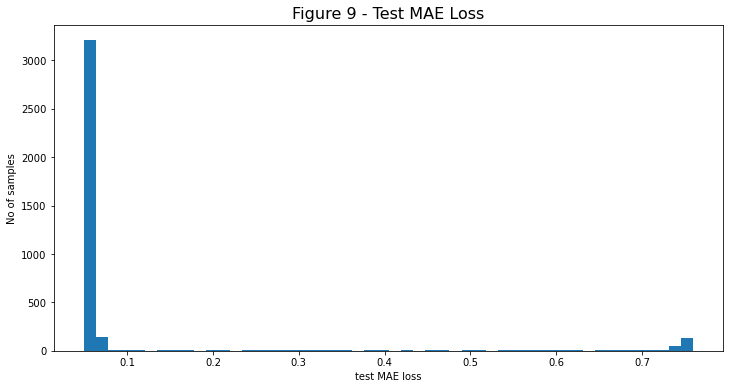

In [65]:
# and plot
fig, ax = plt.subplots(figsize=(12, 6))
plt.title("Figure 9 - Test MAE Loss", size=16)
#
ax.hist(test_mae_loss, bins=50)

# 
ax.set_xlabel("test MAE loss")

# 
ax.set_ylabel("No of samples");

COULD DO A NICE PLOT LIKE THE BLUE ORANGE ONE SHOWING THE ANOMALYRATHER THAN THE RED ONE BELOW

In [66]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold

# Number of anomalies.
np.sum(anomalies)

399

In [67]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
inds = []

for i in range(window_size - 1, len(df_test_value) - window_size + 1):
    if np.all(anomalies[i - window_size + 1 : i]):
        inds.append(i)

In [68]:
# get subset of daily jumpsup if there are anaomolies
df_subset = df_daily_jumpsup.iloc[inds]

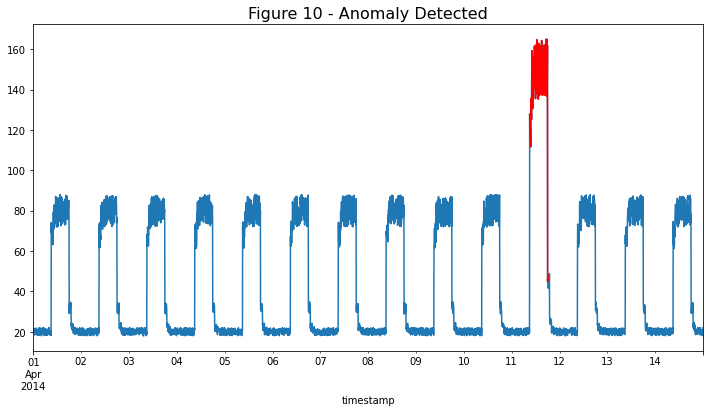

In [69]:
#
fig, ax = plt.subplots(figsize=(12, 6))
plt.title("Figure 10 - Anomaly Detected", size=16)
# 
df_daily_jumpsup.plot(legend=False, ax=ax)

# 
df_subset.plot(legend=False, ax=ax, color="r");

NEED TO ADD MORE HERE IN THE END RE ANAMOLY. MAYBE NICE BLUE/ORGANE PLOT LIKE ABOVE SHOWING THE ANAMOLY


<h2 style="color: #001a79;">Conclusion</h2>

<hr style="border-top: 1px solid #001a79;" />

To do:

Include a conclusion section where you suggest improvements you
could make to the analysis in the notebook.


RE FACTURING THE CODE. TAKEING SOMEONE ELSES CODE AND MAKING IT OUT OWN. CLEANING IT UP. MAKING IT/ EXPLAINING WHAT IT DOES. 

TRYING TO WRITE A NARRATIVE AROUND IT. 

<hr style="border-top: 1px solid #001a79;" />

<h2 style="color: #001a79;">End</h2>